# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/raw/sba_national.csv", low_memory=False)
print(df.shape)
df.sample(3)

(899164, 27)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
613744,6101604005,WORLDWIDE MORTGAGE SERVICES IN,HOLLYWOOD,FL,33024,FLORIDA BUS. DEVEL CORP,FL,321999,14-Feb-03,2003,...,0,N,NaN,15-Oct-03,"$72,000.00",$0.00,P I F,$0.00,"$72,000.00","$72,000.00"
408547,3946574007,THE CELL-SITE,JOPLIN,MO,64801,SOUTHWEST MISSOURI BANK,MO,0,13-Sep-00,2000,...,0,Y,NaN,31-Jan-01,"$25,000.00",$0.00,P I F,$0.00,"$25,000.00","$20,000.00"
26626,1199665002,"Terry Euell Real Estate, Inc.",Rhinebeck,NY,12572,CAPITAL ONE NATL ASSOC,VA,531210,17-Feb-05,2005,...,N,N,13-Sep-10,31-Mar-05,"$50,000.00",$0.00,CHGOFF,"$40,237.00","$50,000.00","$25,000.00"


## Data Validation

In [3]:
df.dtypes

LoanNr_ChkDgt          int64
Name                  object
City                  object
State                 object
Zip                    int64
Bank                  object
BankState             object
NAICS                  int64
ApprovalDate          object
ApprovalFY            object
Term                   int64
NoEmp                  int64
NewExist             float64
CreateJob              int64
RetainedJob            int64
FranchiseCode          int64
UrbanRural             int64
RevLineCr             object
LowDoc                object
ChgOffDate            object
DisbursementDate      object
DisbursementGross     object
BalanceGross          object
MIS_Status            object
ChgOffPrinGr          object
GrAppv                object
SBA_Appv              object
dtype: object

### LoanNr_ChkDgt, Name, City, Zip, Bank, ApprovalFY, FranchiseCode, ChgOffDate, DisbursementDate, BalanceGross, & ChgOffPrinGr

In [4]:
drop_cols = ["LoanNr_ChkDgt",       # tiene 100% de valores distintos
             "Name",                # tiene 86.7% de valores distintos
             "City",                # cuenta con 32581 ciudades diferentes
             "Zip",                 # cuenta con 33611 codigos postales diferentes
             "Bank",                # cuenta con 5802 bancos diferentes
             "ApprovalFY",          # comportamiento similar a ApprovalDate
             "FranchiseCode",       # tiene 94.2% de codigos sin franquicia
             "ChgOffDate",          # fuga de informacion de la variable objetivo
             "DisbursementDate",    # comportamiento similar a ApprovalDate
             "BalanceGross",        # tiene practicamente 100% de valores en cero
             "ChgOffPrinGr"]        # fuga de informacion de la variable objetivo

In [5]:
df.drop(drop_cols, axis=1, inplace=True)
df.shape

(899164, 16)

### State, BankState, Term, NoEmp, CreateJob, RetainedJob & UrbanRural

In [6]:
df["State"].unique()

array(['IN', 'OK', 'FL', 'CT', 'NJ', 'NC', 'IL', 'RI', 'TX', 'VA', 'TN',
       'AR', 'MN', 'MO', 'MA', 'CA', 'SC', 'LA', 'IA', 'OH', 'KY', 'MS',
       'NY', 'MD', 'PA', 'OR', 'ME', 'KS', 'MI', 'AK', 'WA', 'CO', 'MT',
       'WY', 'UT', 'NH', 'WV', 'ID', 'AZ', 'NV', 'WI', 'NM', 'GA', 'ND',
       'VT', 'AL', 'NE', 'SD', 'HI', 'DE', 'DC', nan], dtype=object)

In [7]:
df["BankState"].unique()

array(['OH', 'IN', 'OK', 'FL', 'DE', 'SD', 'AL', 'CT', 'GA', 'OR', 'MN',
       'RI', 'NC', 'TX', 'MD', 'NY', 'TN', 'SC', 'MS', 'MA', 'LA', 'IA',
       'VA', 'CA', 'IL', 'KY', 'PA', 'MO', 'WA', 'MI', 'UT', 'KS', 'WV',
       'WI', 'AZ', 'NJ', 'CO', 'ME', 'NH', 'AR', 'ND', 'MT', 'ID', nan,
       'WY', 'NM', 'DC', 'NV', 'NE', 'PR', 'HI', 'VT', 'AK', 'GU', 'AN',
       'EN', 'VI'], dtype=object)

In [8]:
df["Term"].value_counts()

Term
84     230162
60      89945
240     85982
120     77654
300     44727
        ...  
438         1
382         1
367         1
374         1
429         1
Name: count, Length: 412, dtype: int64

In [9]:
df["NoEmp"].value_counts()

NoEmp
1       154254
2       138297
3        90674
4        73644
5        60319
         ...  
414          1
604          1
1280         1
3089         1
3713         1
Name: count, Length: 599, dtype: int64

In [10]:
df["CreateJob"].value_counts()

CreateJob
0      629248
1       63174
2       57831
3       28806
4       20511
        ...  
171         1
146         1
214         1
179         1
860         1
Name: count, Length: 246, dtype: int64

In [11]:
df["RetainedJob"].value_counts()

RetainedJob
0      440403
1       88790
2       76851
3       49963
4       39666
        ...  
191         1
247         1
226         1
675         1
198         1
Name: count, Length: 358, dtype: int64

In [12]:
df["UrbanRural"].value_counts()

UrbanRural
1    470654
0    323167
2    105343
Name: count, dtype: int64

### ApprovalDate, DisbursementGross, GrAppv & SBA_Appv

In [13]:
# ApprovalDate: formateamos la fecha porque el año tiene dos digitos
def format_date(app_date):
    date = app_date.split("-")
    year = date[2]
    if int(year) > 14: year = "19" + year
    else: year = "20" + year
    return f"{date[0]}-{date[1]}-{year}"

df["ApprovalDate"] = pd.to_datetime(df["ApprovalDate"].apply(format_date))

In [14]:
# DisbursementGross: formateamos la variable de currency a entero
df["DisbursementGross"] = df["DisbursementGross"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["DisbursementGross"] = df["DisbursementGross"].round().astype(int)
df["DisbursementGross"].value_counts()

DisbursementGross
50000      43787
100000     36714
25000      27387
150000     23373
10000      21328
           ...  
143118         1
23827          1
157338         1
60698          1
1086300        1
Name: count, Length: 118859, dtype: int64

In [15]:
# GrAppv: formateamos la variable de currency a entero
df["GrAppv"] = df["GrAppv"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["GrAppv"] = df["GrAppv"].round().astype(int)
df["GrAppv"].value_counts()

GrAppv
50000      69394
25000      51258
100000     50977
10000      38366
150000     27624
           ...  
407542         1
220900         1
57587          1
531577         1
1086300        1
Name: count, Length: 22128, dtype: int64

In [16]:
# SBA_Appv: formateamos la variable de currency a entero
df["SBA_Appv"] = df["SBA_Appv"].str.replace(r"[\$,]", "", regex=True).astype(float)
df["SBA_Appv"] = df["SBA_Appv"].round().astype(int)
df["SBA_Appv"].value_counts()

SBA_Appv
25000     49579
12500     40147
5000      31135
50000     25047
10000     17009
          ...  
192949        1
212352        1
57072         1
32938         1
715674        1
Name: count, Length: 38326, dtype: int64

### NAICS, NewExist, RevLineCr & LowDoc

In [17]:
# NAICS: asignamos a NAICS el nombre del sector correspondiente
sector = {"11":"Agriculture, forestry, fishing and hunting",
          "21":"Mining, quarrying, and oil and gas extraction",
          "22":"Utilities",
          "23":"Construction",
          "31":"Manufacturing",
          "32":"Manufacturing",
          "33":"Manufacturing",
          "42":"Wholesale trade",
          "44":"Retail trade",
          "45":"Retail trade",
          "48":"Transportation and warehousing",
          "49":"Transportation and warehousing",
          "51":"Information",
          "52":"Finance and insurance",
          "53":"Real estate and rental and leasing",
          "54":"Professional, scientific, and technical services",
          "55":"Management of companies and enterprises",
          "56":"Administrative and support and waste management and remediation services",
          "61":"Educational services",
          "62":"Health care and social assistance",
          "71":"Arts, entertainment, and recreation",
          "72":"Accommodation and food services",
          "81":"Other services (except public administration)",
          "92":"Public administration",
          "0":"[Unallocated sector]"} # creamos la categoria "sector no asignado"}

df["NAICS"] = df["NAICS"].astype(str).str[0:2]
df["NAICS"] = df["NAICS"].apply(lambda x: sector[x])
df["NAICS"].value_counts()

NAICS
[Unallocated sector]                                                        201948
Retail trade                                                                127251
Other services (except public administration)                                72618
Professional, scientific, and technical services                             68170
Manufacturing                                                                68029
Accommodation and food services                                              67600
Construction                                                                 66646
Health care and social assistance                                            55366
Wholesale trade                                                              48743
Administrative and support and waste management and remediation services     32685
Transportation and warehousing                                               22531
Arts, entertainment, and recreation                                          1464

In [18]:
# NewExist: convertimos a NaN los valores no definidos
df["NewExist"] = np.where(df["NewExist"]==0.0, np.nan, df["NewExist"])
df["NewExist"] = df["NewExist"].astype("Int64")
df["NewExist"].value_counts()

NewExist
1    644869
2    253125
Name: count, dtype: Int64

In [19]:
# RevLineCr: convertimos a enteros los valores definidos y a NaN los demas
# asumiremos que T (true) y 1 podrian ser Y (yes), y 0 podria ser N (no)
df["RevLineCr"] = np.where(df["RevLineCr"].isin(["Y","T"]), "1", df["RevLineCr"])
df["RevLineCr"] = np.where(df["RevLineCr"].isin(["N"]), "0", df["RevLineCr"])
df["RevLineCr"] = np.where(~df["RevLineCr"].isin(["1","0"]), np.nan, df["RevLineCr"])
df["RevLineCr"] = df["RevLineCr"].astype("Int64")
df["RevLineCr"].value_counts()

RevLineCr
0    677890
1    216704
Name: count, dtype: Int64

In [20]:
# LowDoc: convertimos a enteros los valores definidos y a NaN los demas
# asumiremos que 1 podria ser Y (yes), y que 0 podria ser N (no)
df["LowDoc"] = np.where(df["LowDoc"]=="Y", "1", df["LowDoc"])
df["LowDoc"] = np.where(df["LowDoc"]=="N", "0", df["LowDoc"])
df["LowDoc"] = np.where(~df["LowDoc"].isin(["1","0"]), np.nan, df["LowDoc"])
df["LowDoc"] = df["LowDoc"].astype("Int64")
df["LowDoc"].value_counts()

LowDoc
0    784313
1    110336
Name: count, dtype: Int64

### MIS_Status

In [21]:
# MIS_Status: convertimos los valores a enteros (1 = Default y 0 = Paid)
df["MIS_Status"] = np.where(df["MIS_Status"]=="CHGOFF", 1, df["MIS_Status"])
df["MIS_Status"] = np.where(df["MIS_Status"]=="P I F", 0, df["MIS_Status"])
df["MIS_Status"] = df["MIS_Status"].astype("Int64")
df["MIS_Status"].value_counts()

MIS_Status
0    739609
1    157558
Name: count, dtype: Int64

### Drop Duplicates

In [22]:
# adicionalmente se visualizan y eliminan las instancias duplicadas
print(df[df.duplicated].shape)
display(df[df.duplicated].sample(3))

df.drop_duplicates(inplace=True)

(430, 16)


,State,BankState,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
862896,VT,SD,[Unallocated sector],1996-05-20,60,8,1,0,0,0,0,0,25000,0,25000,12500
508382,WA,OR,Retail trade,2011-10-19,300,14,1,0,9,1,0,0,915500,0,915500,686625
667507,PA,RI,"Professional, scientific, and technical services",2003-10-09,84,1,1,0,1,1,1,0,5000,0,5000,2500


In [23]:
print(df.shape)
df.dtypes

(898734, 16)


State                        object
BankState                    object
NAICS                        object
ApprovalDate         datetime64[ns]
Term                          int64
NoEmp                         int64
NewExist                      Int64
CreateJob                     int64
RetainedJob                   int64
UrbanRural                    int64
RevLineCr                     Int64
LowDoc                        Int64
DisbursementGross             int64
MIS_Status                    Int64
GrAppv                        int64
SBA_Appv                      int64
dtype: object

## Missing Values

In [24]:
df.isnull().sum()

State                  14
BankState            1564
NAICS                   0
ApprovalDate            0
Term                    0
NoEmp                   0
NewExist             1169
CreateJob               0
RetainedJob             0
UrbanRural              0
RevLineCr            4568
LowDoc               4514
DisbursementGross       0
MIS_Status           1956
GrAppv                  0
SBA_Appv                0
dtype: int64

### Using FillNA and DropNA

In [25]:
# imputamos los valores faltantes con la moda de la variable
mode = df["State"].mode()[0]
df["State"] = df["State"].fillna(mode)

In [26]:
# eliminamos todas las instancias nulas de la variable objetivo
df.dropna(subset=["MIS_Status"], inplace=True)
df["MIS_Status"] = df["MIS_Status"].astype(int)
df.shape

(896778, 16)

### Univariant: Simple Imputer

In [27]:
# imputamos los valores faltantes con la moda de la variable
col_values = df[["BankState"]]
mode_imputer = SimpleImputer(strategy="most_frequent")
mode_imputer_fit = mode_imputer.fit(col_values)
df["BankState"] = mode_imputer_fit.transform(col_values)[:, 0]

### Multivariant: KNN Imputer

In [28]:
# aplicamos imputacion multivariante de faltantes con KNN Imputer
cols_fit = df[["NewExist", "Term", "NoEmp", "CreateJob", "RetainedJob",
               "UrbanRural", "DisbursementGross", "GrAppv", "SBA_Appv"]]
k = int(round(np.sqrt(df.shape[0]), 2))
knn_imputer = KNNImputer(n_neighbors=k)
knn_imputer_fit = knn_imputer.fit(cols_fit)

cols_imputed = knn_imputer_fit.transform(cols_fit)
df["NewExist"] = cols_imputed[:, 0]

df["NewExist"] = round(df["NewExist"]).astype(int)
df["NewExist"].value_counts()

NewExist
1    644256
2    252522
Name: count, dtype: int64

### Using Classification Models

In [29]:
# imputamos valores categoricos faltantes utilizando modelos de clasificacion
cols = ["RevLineCr", "LowDoc"]
for col in cols:
    df_ = df[[col, "Term", "NoEmp", "CreateJob", "RetainedJob",
              "UrbanRural", "DisbursementGross", "GrAppv", "SBA_Appv"]]

    df_train = df_.dropna(subset=[col])
    df_test = df_[df_[col].isnull()]

    X_train = df_train.drop(columns=[col])
    y_train = df_train[col]
    X_test = df_test.drop(columns=[col])

    rf_classifier = RandomForestClassifier()
    rf_classifier.fit(X_train, y_train)

    y_test = rf_classifier.predict(X_test)
    df.loc[df[col].isnull(), col] = y_test

    df[col] = df[col].astype(int)
    print(f"{col}:")
    print(f"{df[col].value_counts()}\n")

RevLineCr:
RevLineCr
0    680941
1    215837
Name: count, dtype: int64

LowDoc:
LowDoc
0    786553
1    110225
Name: count, dtype: int64



In [30]:
print(df.shape)
df.isnull().sum()

(896778, 16)


State                0
BankState            0
NAICS                0
ApprovalDate         0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
MIS_Status           0
GrAppv               0
SBA_Appv             0
dtype: int64

## Outlier Detection

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 896778 entries, 0 to 899163
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              896778 non-null  object        
 1   BankState          896778 non-null  object        
 2   NAICS              896778 non-null  object        
 3   ApprovalDate       896778 non-null  datetime64[ns]
 4   Term               896778 non-null  int64         
 5   NoEmp              896778 non-null  int64         
 6   NewExist           896778 non-null  int64         
 7   CreateJob          896778 non-null  int64         
 8   RetainedJob        896778 non-null  int64         
 9   UrbanRural         896778 non-null  int64         
 10  RevLineCr          896778 non-null  int64         
 11  LowDoc             896778 non-null  int64         
 12  DisbursementGross  896778 non-null  int64         
 13  MIS_Status         896778 non-null  int64        

### Z-Score

In [32]:
# usamos la desviacion estandar y Z-score con umbral de 3 para detectar outliers
cols = ["Term", "NoEmp"]
for col in cols:
    media = df[col].mean()
    dest = df[col].std()
    umbral = 3

    z_scores = (df[col] - media) / dest
    df = df[(z_scores.abs() <= umbral)]

    print(f"{col}:")
    print(f"Media: {round(media, 1)}")
    print(f"Desviacion: {round(dest, 1)}")
    print(f"Limite Max: {round(media + (dest * umbral), 1)}")
    print(f"Outliers: {z_scores[z_scores > umbral].count()}\n")

print(df.shape)

Term:
Media: 110.9
Desviacion: 78.9
Limite Max: 347.6
Outliers: 183

NoEmp:
Media: 11.4
Desviacion: 73.8
Limite Max: 232.8
Outliers: 1448

(895147, 16)


### Interquartile Range

In [33]:
# usamos el rango intercuartilico IQR multiplicado con 7.5 como factor de escala
Q1 = df["DisbursementGross"][df["DisbursementGross"] > 0].quantile(0.25)
Q3 = df["DisbursementGross"][df["DisbursementGross"] > 0].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 7.5* IQR
outliers = df[(df["DisbursementGross"] < limite_inferior) | (df["DisbursementGross"] > limite_superior)].shape[0]

df = df[(df["DisbursementGross"] >= limite_inferior) & (df["DisbursementGross"] <= limite_superior)]

print(f"Rango Intercuartilico: {round(IQR, 1)}")
print(f"Limite Inferior: {round(limite_inferior, 1)}")
print(f"Limite Superior: {round(limite_superior, 1)}")
print(f"Outliers: {outliers}")
print(df.shape)

Rango Intercuartilico: 195200.0
Limite Inferior: -250500.0
Limite Superior: 1701500.0
Outliers: 4085
(891062, 16)


### Elliptic Envelope

In [34]:
# aplicamos el ajuste de una envolvente eliptica para datos multivariados
df_ = df[["GrAppv","SBA_Appv"]].copy()
# model_outlier = IsolationForest(contamination=0.01)
model_outlier = EllipticEnvelope(contamination=0.01)
model_outlier.fit(df_)

outliers = model_outlier.predict(df_)
df_["Outlier"] = np.where(outliers == -1, 1, 0)
df = df[df_["Outlier"] == 0]

out_count = df_[df_["Outlier"]==1].shape[0]
print(f"Outliers: {out_count}")
print(df.shape)

Outliers: 8912
(882150, 16)


In [35]:
print(df.shape)
df.sample(3)

(882150, 16)


,State,BankState,NAICS,ApprovalDate,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,GrAppv,SBA_Appv
22337,PA,RI,Retail trade,2005-01-21,31,2,1,0,2,1,0,0,25000,1,25000,12500
863359,MT,MT,[Unallocated sector],1996-05-22,84,2,2,0,0,0,0,1,27000,0,27000,21600
649721,OH,OH,Other services (except public administration),2003-07-22,84,2,2,0,0,1,0,1,103500,0,103500,87975


## Feature Engineering

### Create Features

In [36]:
# creamos una variable que define si State y BankState son similares
df["DifState"] = np.where(df["State"] != df["BankState"], 1, 0)

In [37]:
# cambiamos de nombre la variable NAICS a Sector que la describe mejor
df.rename(columns={"NAICS":"Sector"}, inplace=True)

In [38]:
# escalamos los valores de la variable NewExist a valores binarios
df["NewExist"] = np.where(df["NewExist"] == 2, 1, 0)

In [39]:
# calculamos si el prestamo esta garantizado con una propiedad inmobiliaria
df["Secured"] = np.where(df["Term"] >= 240, 1, 0)

In [40]:
# calculamos la fecha de vencimiento sumando Term a DisbursementDate
# df["ExpirationDate"] = df.apply(lambda x: x["DisbursementDate"]
#                                 + pd.DateOffset(months=x["Term"]), axis=1)

In [41]:
# creamos variables para el año y mes de la variable ApprovalDate
df["AppYear"] = df["ApprovalDate"].dt.year
df["AppMonth"] = df["ApprovalDate"].dt.month

In [42]:
# calculamos el porcentaje del monto de SBA_Appv aportado sobre GrAppv
df["SecuredSBA"] = round((df["SBA_Appv"] / df["GrAppv"]) * 100)
df["SecuredSBA"] = df["SecuredSBA"].astype(int)

In [43]:
# cambiamos de nombre algunas de las variables por una abreviacion
df.rename(columns={"NAICS":"Sector",
                   "RevLineCr":"RevLine",
                   "DisbursementGross":"GrDisburs",
                   "GrAppv":"GrApprov",
                   "SBA_Appv":"ApprovSBA",
                   "MIS_Status":"Default"}, inplace=True)

In [44]:
# ordenamos adecuadamente todas las variables actuales del dataset
df = df[["State","BankState","DifState","Sector","AppYear","AppMonth","Term",
         "Secured","NoEmp","NewExist","CreateJob","RetainedJob","UrbanRural",
         "RevLine","LowDoc","GrDisburs","GrApprov","ApprovSBA","SecuredSBA","Default"]]

In [45]:
print(df.shape)
df.sample(3)

(882150, 20)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
377010,CT,IL,1,[Unallocated sector],2000,3,12,0,5,1,5,5,1,1,0,190000,100000,50000,50,0
481588,NH,NH,0,[Unallocated sector],1991,11,180,0,11,0,0,0,0,0,0,140000,140000,126000,90,0
366053,OK,OK,0,Retail trade,2009,8,300,1,26,0,0,26,2,0,0,986500,986500,887850,90,0


### Feature Analisys

In [46]:
# verificamos que todos los tipos de datos del dataset sean correctos
df.dtypes

State          object
BankState      object
DifState        int64
Sector         object
AppYear         int32
AppMonth        int32
Term            int64
Secured         int64
NoEmp           int64
NewExist        int64
CreateJob       int64
RetainedJob     int64
UrbanRural      int64
RevLine         int64
LowDoc          int64
GrDisburs       int64
GrApprov        int64
ApprovSBA       int64
SecuredSBA      int64
Default         int64
dtype: object

In [47]:
# separamos en listas las variables binarias, numericas y categoricas
bin_cols = ["DifState","Secured","NewExist",
            "RevLine","LowDoc","Default"]           # binarias

num_cols = ["Term","NoEmp","CreateJob",
            "RetainedJob","SecuredSBA",             # numericas discretas
            "GrDisburs","GrApprov","ApprovSBA"]     # numericas continuas

cat_cols = ["State","BankState","Sector",           # categoricas nominales
            "UrbanRural",                           # categoricas numericas
            "AppYear","AppMonth"]                   # categoricas ordinales

# _ = df.select_dtypes("int").columns.to_list()
print(f"Binary:    {bin_cols}")
print(f"Numeric:   {num_cols}")
print(f"Categoric: {cat_cols}")

Binary:    ['DifState', 'Secured', 'NewExist', 'RevLine', 'LowDoc', 'Default']
Numeric:   ['Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'SecuredSBA', 'GrDisburs', 'GrApprov', 'ApprovSBA']
Categoric: ['State', 'BankState', 'Sector', 'UrbanRural', 'AppYear', 'AppMonth']


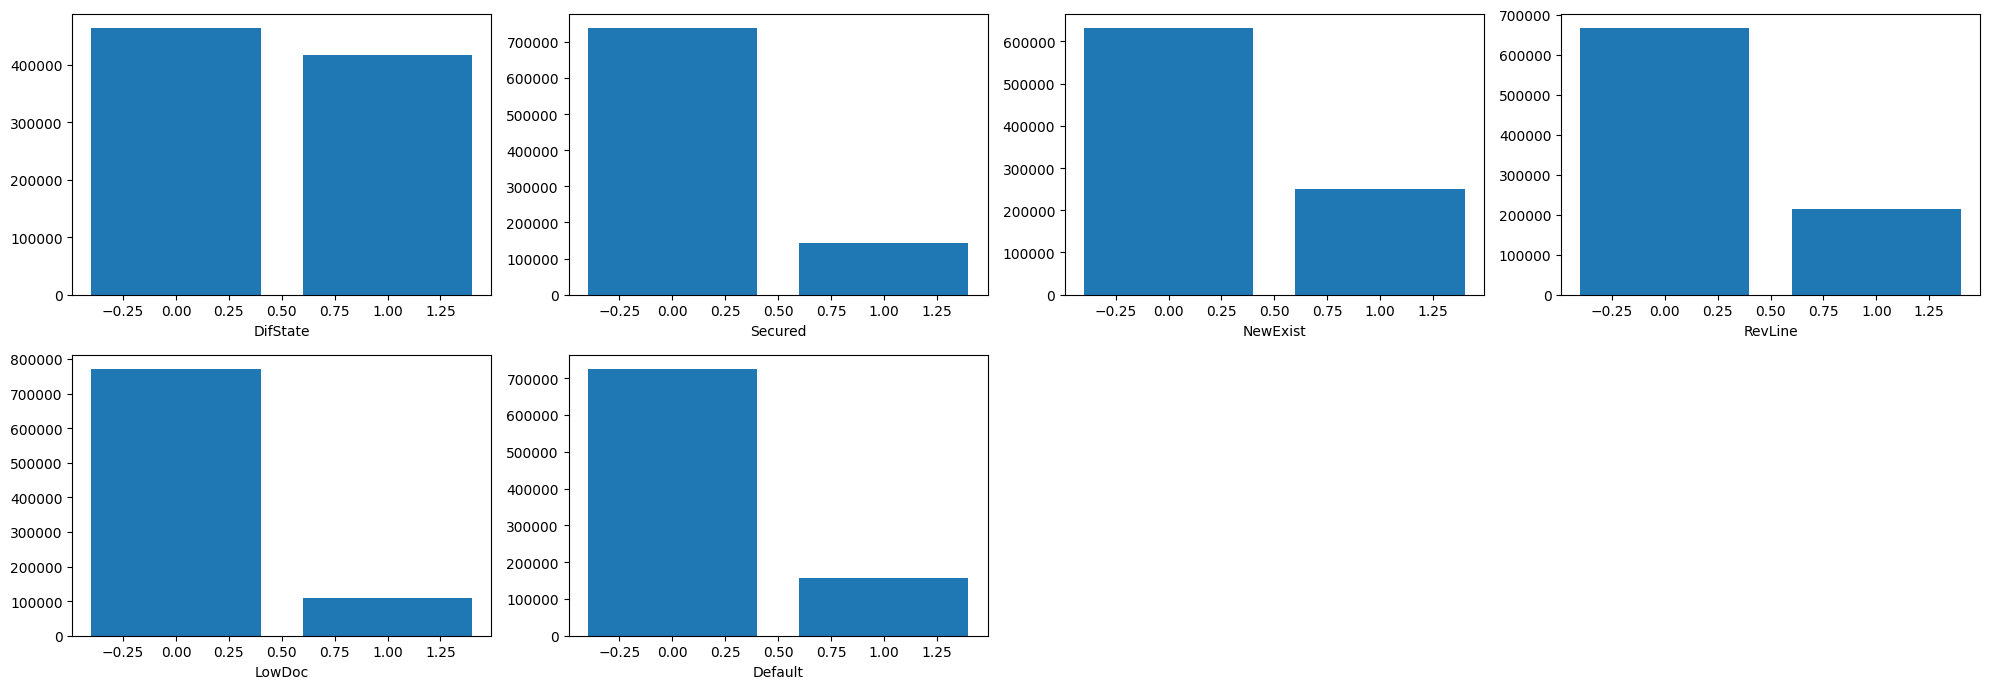

In [48]:
# graficamos la distribucion de los datos de las variables binarias
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(bin_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    plt.bar(df_[col], df_["count"])
    plt.xlabel(col)

plt.tight_layout()
plt.show()

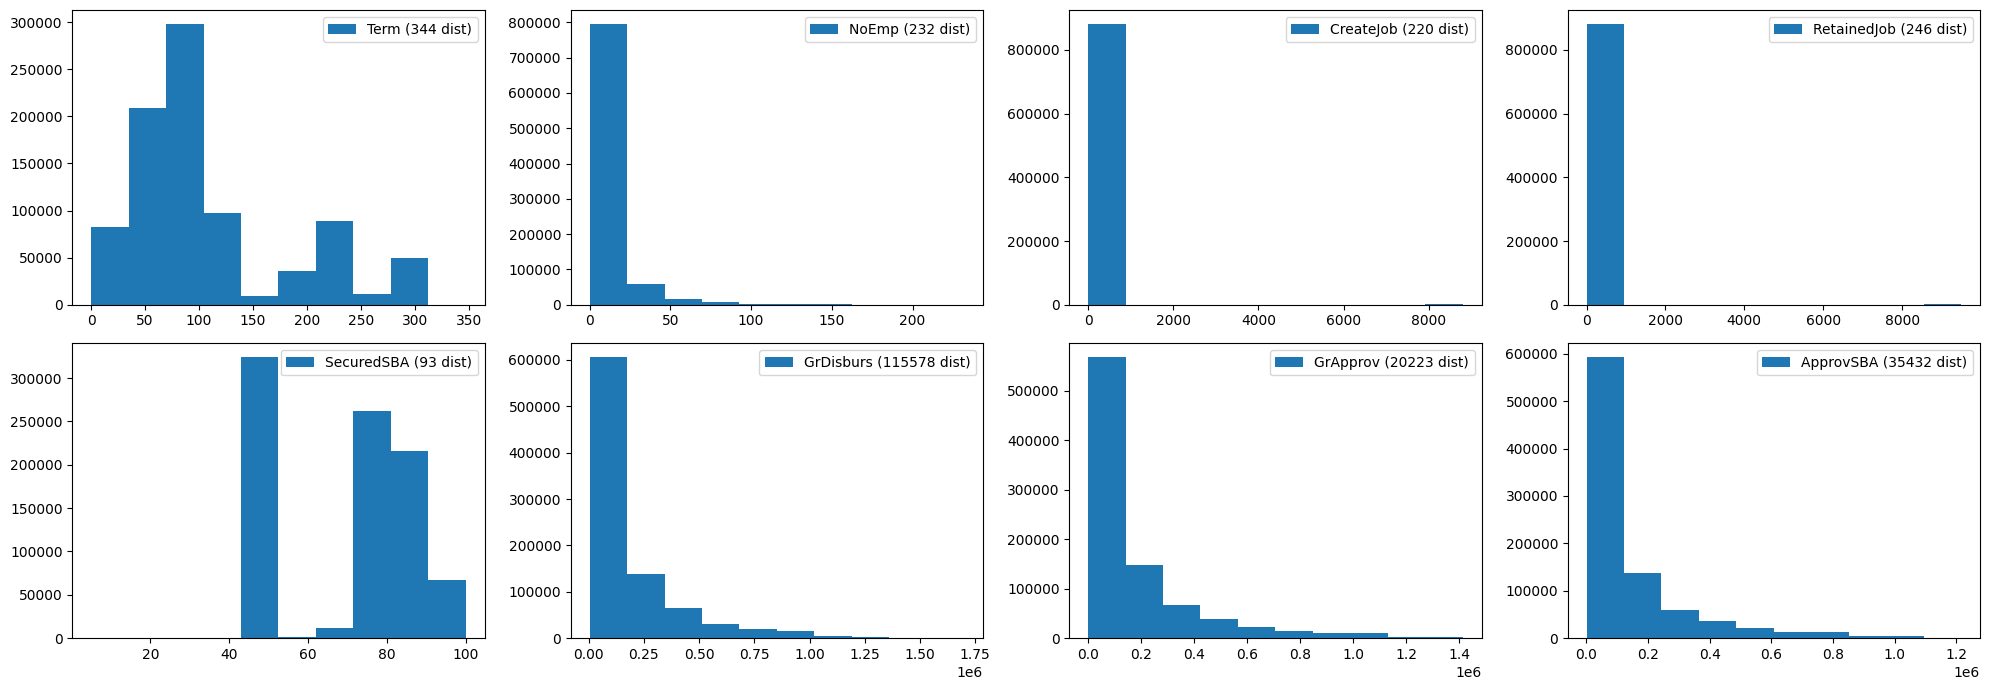

In [49]:
# graficamos la distribucion de los datos de las variables numericas
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    col_cls = col + " (" + str(df[col].value_counts().count()) + " dist)"
    plt.hist(df[col], label=col_cls)
    plt.legend()

plt.tight_layout()
plt.show()

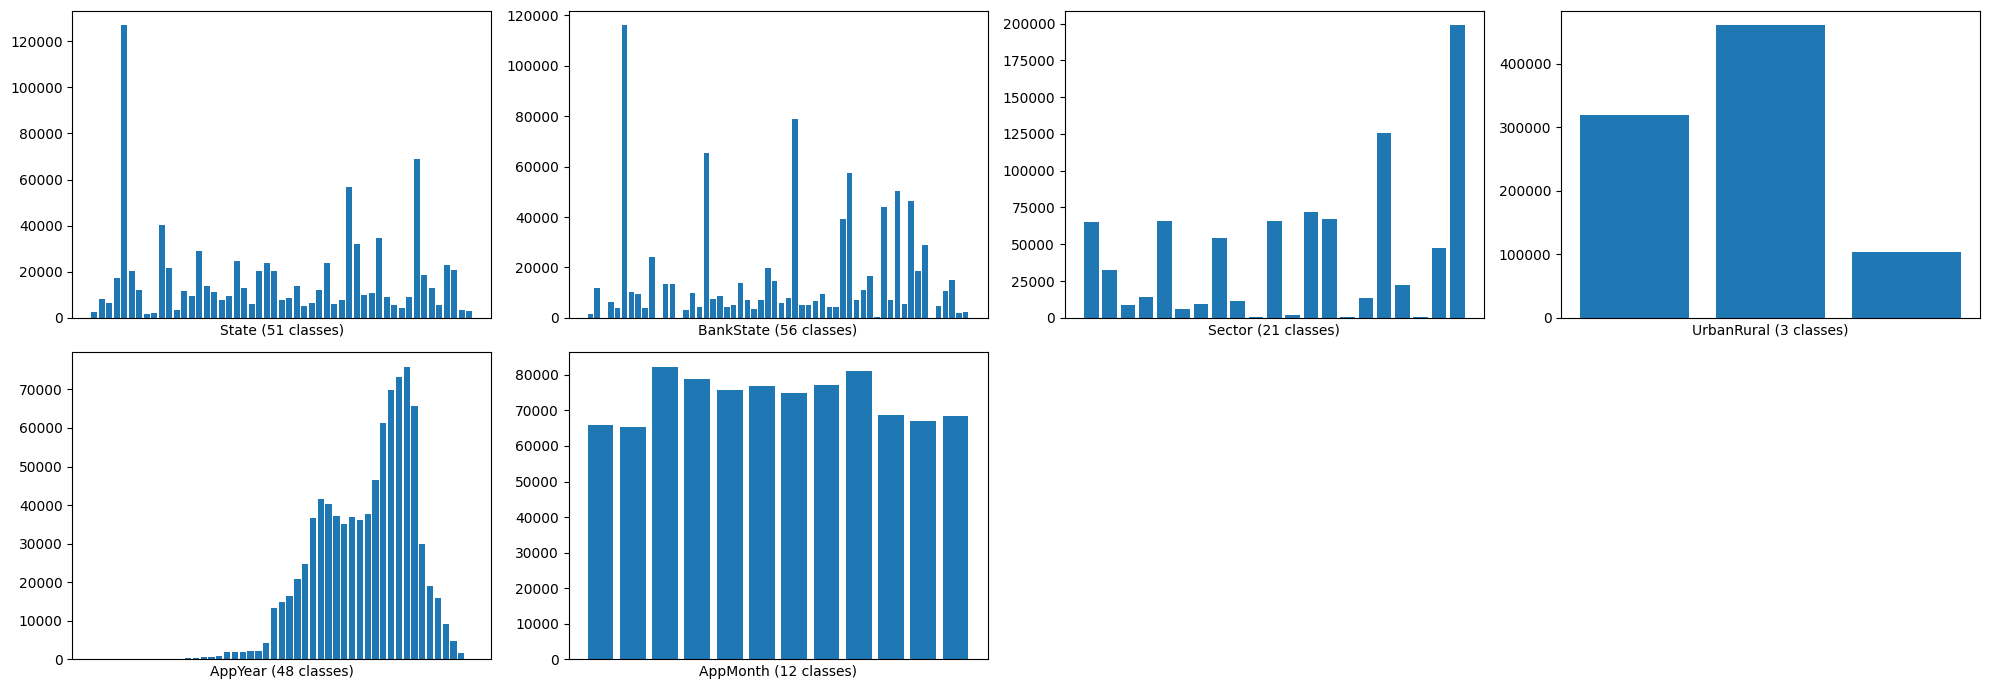

In [50]:
# graficamos la distribucion de los datos de las variables categoricas
plt.figure(figsize=(20,7))
n_rows, n_cols = 2, 4

for num, col in enumerate(cat_cols):
    plt.subplot(n_rows, n_cols, num + 1)
    df_ = df.groupby(col)[col].count().reset_index(name="count")
    plt.bar(df_[col], df_["count"])
    col_cls = col + " (" + str(df[col].value_counts().count()) + " classes)"
    plt.xlabel(col_cls)
    plt.xticks([])

plt.tight_layout()
plt.show()

### Standardization

La estandarizacion es util cuando los datos siguen una distribucion normal y queremos tener una media de 0 y una desviacion estandar de 1.

Estandarizar variables depende del modelo a utilizar, como algoritmos que utilizan descenso de gradiente en regresiones o redes neuronales.

Algunos algoritmos, como los arboles de decisión, no se ven afectados por la escala de las variables, por lo que no necesitan estandarizacion.

In [51]:
# aplicaremos estandarizacion solo a modo de ejemplo sobre un dataset clonado
df_ = df.copy()

scaler = StandardScaler()
df_[num_cols] = scaler.fit_transform(df_[num_cols])

media = round(df_["Term"].mean(), 1)
dest = round(df_["Term"].std(), 1)
print(f"Media Term: {media}")
print(f"Desviacion Term: {dest}")
df_[num_cols].sample(3)

Media Term: -0.0
Desviacion Term: 1.0


,Term,NoEmp,CreateJob,RetainedJob,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
188552,-0.634187,-0.460373,-0.035178,-0.044425,1.101421,-0.707690,-0.673657,-0.620872
575331,-0.479703,-0.520201,-0.035178,-0.044425,1.101421,-0.791206,-0.757544,-0.712204
144073,-0.943155,-0.340717,-0.035178,-0.027625,-1.207845,-0.733873,-0.699956,-0.688342


### Normalization

La normalizacion se refiere a escalar los valores de una variable para que esten en un rango especifico, generalmente entre 0 y 1.

Normalizar variables depende del modelo a utilizar, como algoritmos que utilizan medidas de distancia, como el K-NN o el K-Means.

Algunos algoritmos, como los arboles de decisión, no se ven afectados por la escala de las variables, por lo que no necesitan normalizacion.

In [52]:
# aplicaremos normalizacion solo a modo de ejemplo sobre un dataset clonado
df_ = df.copy()

normalizer = MinMaxScaler()
normalizer_fit = normalizer.fit(df_[num_cols])
df_[num_cols] = normalizer_fit.transform(df_[num_cols])

min = round(df_["Term"].min(), 1)
max = round(df_["Term"].max(), 1)
print(f"Min Term: {min}")
print(f"Max Term: {max}")
df_[num_cols].sample(3)

Min Term: 0.0
Max Term: 1.0


,Term,NoEmp,CreateJob,RetainedJob,SecuredSBA,GrDisburs,GrApprov,ApprovSBA
705051,0.242075,0.004310,0.0,0.000105,0.473684,0.000589,0.002831,0.001645
357693,0.224784,0.193966,0.0,0.004737,1.000000,0.018268,0.024062,0.028382
311455,0.345821,0.008621,0.0,0.000000,0.789474,0.035946,0.045294,0.042368


### Encode Features

In [53]:
# Label Encoder: aplicamos a las variables categoricas nominales
label_encoder = LabelEncoder()
for col in cat_cols[:2]:
    df[col] = label_encoder.fit_transform(df[col])

sector_encoder = LabelEncoder()
sector_encoder_fit = sector_encoder.fit(df["Sector"])
df["Sector"] = sector_encoder_fit.transform(df["Sector"])

print(sector_encoder_fit.classes_[0:3])
print(sector_encoder_fit.inverse_transform([4]))
df[cat_cols[:3]].sample(3)

['Accommodation and food services'
 'Administrative and support and waste management and remediation services'
 'Agriculture, forestry, fishing and hunting']
['Construction']


,State,BankState,Sector
335756,48,53,20
348188,18,21,4
308608,35,38,16


In [55]:
# One-Hot Encoder: aplicamos a las variables categoricas numerales
df = pd.get_dummies(df, columns=["UrbanRural"])

df.rename(columns={"UrbanRural_1":"Urban", "UrbanRural_2":"Rural"}, inplace=True)
df.drop(columns="UrbanRural_0", axis=1, inplace=True)

df["Urban"] = df["Urban"].astype(int)
df["Rural"] = df["Rural"].astype(int)
df = df[["State","BankState","DifState","Sector","AppYear","AppMonth","Term",
         "Secured","NoEmp","NewExist","CreateJob","RetainedJob","Urban","Rural",
         "RevLine","LowDoc","GrDisburs","GrApprov","ApprovSBA","SecuredSBA","Default"]]
df[["Urban","Rural"]].sample(3)

,Urban,Rural
585394,0,0
298570,0,1
791411,0,0


In [56]:
# Ordinal Encoder: aplicamos a las variables categoricas ordinales (sin AppMonth)
ordinal_encoder = OrdinalEncoder(categories=[list(sorted(df["AppYear"].unique()))])
ordinal_encoder_fit = ordinal_encoder.fit(df[["AppYear"]])
df["AppYear"] = ordinal_encoder_fit.transform(df[["AppYear"]])
df["AppYear"] = df["AppYear"].astype(int)

print(ordinal_encoder_fit.categories_)
print(ordinal_encoder_fit.inverse_transform([[44]]))
df[["AppYear"]].sample(3)

[array([1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014], dtype=int32)]
[[2011]]


,AppYear
756781,27
578576,26
514662,25


### Feature Selection

In [57]:
print(df.shape)
df.sample(3)

(882150, 21)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,...,RetainedJob,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
174185,22,38,1,17,40,1,7,0,1,1,...,1,1,0,0,0,84000,84000,42000,50,1
715595,4,30,1,1,37,5,84,0,1,0,...,1,1,0,1,0,10563,10000,5000,50,0
382764,34,37,0,0,33,4,60,0,11,0,...,0,0,1,0,0,165000,165000,123750,75,0


In [58]:
# separamos las features en variables predictoras y variable objetivo
X = df.drop(columns="Default")
y = df.Default

In [59]:
# VarianceThreshold: calculamos la varianza de cada feature (normalizada)
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

var_threshold = VarianceThreshold()
var_threshold_fit = var_threshold.fit(X_)
variances = var_threshold_fit.variances_

threshold = 0.3
variances_th = pd.Series(variances, index=X.columns)
variances_th[variances_th < threshold].sort_values()

RetainedJob    0.000628
CreateJob      0.000730
NoEmp          0.005191
AppYear        0.015793
GrDisburs      0.017039
ApprovSBA      0.022493
GrApprov       0.024360
SecuredSBA     0.033245
Term           0.050111
BankState      0.082112
State          0.091254
AppMonth       0.093395
Rural          0.103151
LowDoc         0.109290
Sector         0.112617
Secured        0.135821
RevLine        0.184250
NewExist       0.202863
DifState       0.249267
Urban          0.249525
dtype: float64

In [60]:
# Mutual Information Analysis: calculamos la relevancia de cada feature
mutual_inf = mutual_info_classif(X, y)

mi_scores = pd.Series(mutual_inf, index=X.columns)
mi_scores.sort_values()

CreateJob      0.000000
RetainedJob    0.000133
Rural          0.005301
NoEmp          0.006700
LowDoc         0.011413
ApprovSBA      0.013195
GrDisburs      0.013487
GrApprov       0.013556
RevLine        0.024108
NewExist       0.024536
Secured        0.036740
AppMonth       0.041164
State          0.044367
BankState      0.046193
Sector         0.069004
SecuredSBA     0.078054
DifState       0.079139
Urban          0.089193
AppYear        0.093461
Term           0.156025
dtype: float64

In [61]:
# Feature Importance Selection: calculamos la importancia de las features
random_forest = RandomForestClassifier(n_estimators=100, random_state=44)
rf_fit = random_forest.fit(X, y)
importance = rf_fit.feature_importances_

results_fis = pd.Series(importance, index=X.columns)
results_fis.sort_values()

LowDoc         0.003422
Rural          0.004094
NewExist       0.008110
Secured        0.008275
RevLine        0.010933
Urban          0.011990
CreateJob      0.014895
RetainedJob    0.026896
DifState       0.026977
SecuredSBA     0.027212
Sector         0.028787
NoEmp          0.030062
AppMonth       0.030246
GrApprov       0.038327
State          0.042456
GrDisburs      0.046122
ApprovSBA      0.047582
BankState      0.050222
AppYear        0.111934
Term           0.431459
dtype: float64

In [62]:
# aplicando los enfoques anteriores eliminamos las features de menor importancia
df = df.drop(columns=["RetainedJob","CreateJob"])

In [63]:
# vemos una muestra de la version limpia y la almacenamos en un nuevo dataset
print(df.shape)
df.sample(3)

(882150, 19)


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
187178,12,15,0,13,31,9,240,1,8,0,0,0,0,0,186000,186000,186000,100,0
283569,20,5,1,15,41,2,81,0,25,0,1,0,0,0,15000,15000,12750,85,1
11576,10,30,1,1,37,10,84,0,3,1,1,0,1,0,10000,10000,5000,50,0


## Imbalanced Data

In [64]:
print(df.shape)
print(df["Default"].value_counts())

(882150, 19)
Default
0    725749
1    156401
Name: count, dtype: int64


In [65]:
# separamos las features en variables predictoras y variable objetivo
X = df.drop(columns="Default")
y = df["Default"]

### UnderSampling

In [66]:
# aplicamos SubSampling y posteriormente revisamos los resultados
undersampler = RandomUnderSampler(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_under = pd.DataFrame(X_resampled)
df_under["Default"] = y_resampled

In [67]:
print(df_under.shape)
print(df_under["Default"].value_counts())
df_under.sample(3)

(312802, 19)
Default
0    156401
1    156401
Name: count, dtype: int64


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
62231,38,43,1,12,38,9,31,0,10,0,1,0,0,0,100000,100000,50000,50,1
201227,5,6,0,16,31,10,120,0,8,1,0,0,0,1,130000,130000,97500,75,0
595058,38,41,0,1,35,11,5,0,2,0,1,0,1,0,25000,25000,12500,50,1


### OverSampling

In [68]:
oversampler = RandomOverSampler(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_over = pd.DataFrame(X_resampled)
df_over["Default"] = y_resampled

In [69]:
print(df_over.shape)
print(df_over["Default"].value_counts())
df_over.sample(3)

(1451498, 19)
Default
0    725749
1    725749
Name: count, dtype: int64


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
1380346,9,30,1,10,40,2,23,0,1,1,1,0,1,0,8650,5000,2500,50,1
1232192,22,43,1,16,38,10,44,0,4,0,1,0,0,0,91190,100000,50000,50,1
1270630,14,49,1,19,38,2,40,0,2,0,1,0,0,0,50000,50000,25000,50,1


### SMOTE: Synthetic Minority Over-Sampling Technique

In [70]:
# aplicamos SMOTE y posteriormente revisamos los resultados
smote = SMOTE(sampling_strategy="auto", random_state=44)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_smote = pd.DataFrame(X_resampled)
df_smote["Default"] = y_resampled

In [71]:
print(df_smote.shape)
print(df_smote["Default"].value_counts())
df_smote.sample(3)

(1451498, 19)
Default
0    725749
1    725749
Name: count, dtype: int64


,State,BankState,DifState,Sector,AppYear,AppMonth,Term,Secured,NoEmp,NewExist,Urban,Rural,RevLine,LowDoc,GrDisburs,GrApprov,ApprovSBA,SecuredSBA,Default
367670,47,38,1,7,42,9,300,1,3,1,1,0,0,0,87800,170000,153000,90,0
325992,32,45,1,1,41,7,84,0,5,1,0,1,0,0,185000,185000,92500,50,0
1297045,30,33,0,9,39,6,45,0,4,0,1,0,0,0,388000,388000,291000,75,1
